In [20]:
!pip install catboost


In [19]:
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics
from matplotlib import pyplot
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from catboost import CatBoostClassifier
import pandas as pd
from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings('ignore')

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Bangalore-Internship/diabetes.csv')
diabetes.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [ ]:
diabetes.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


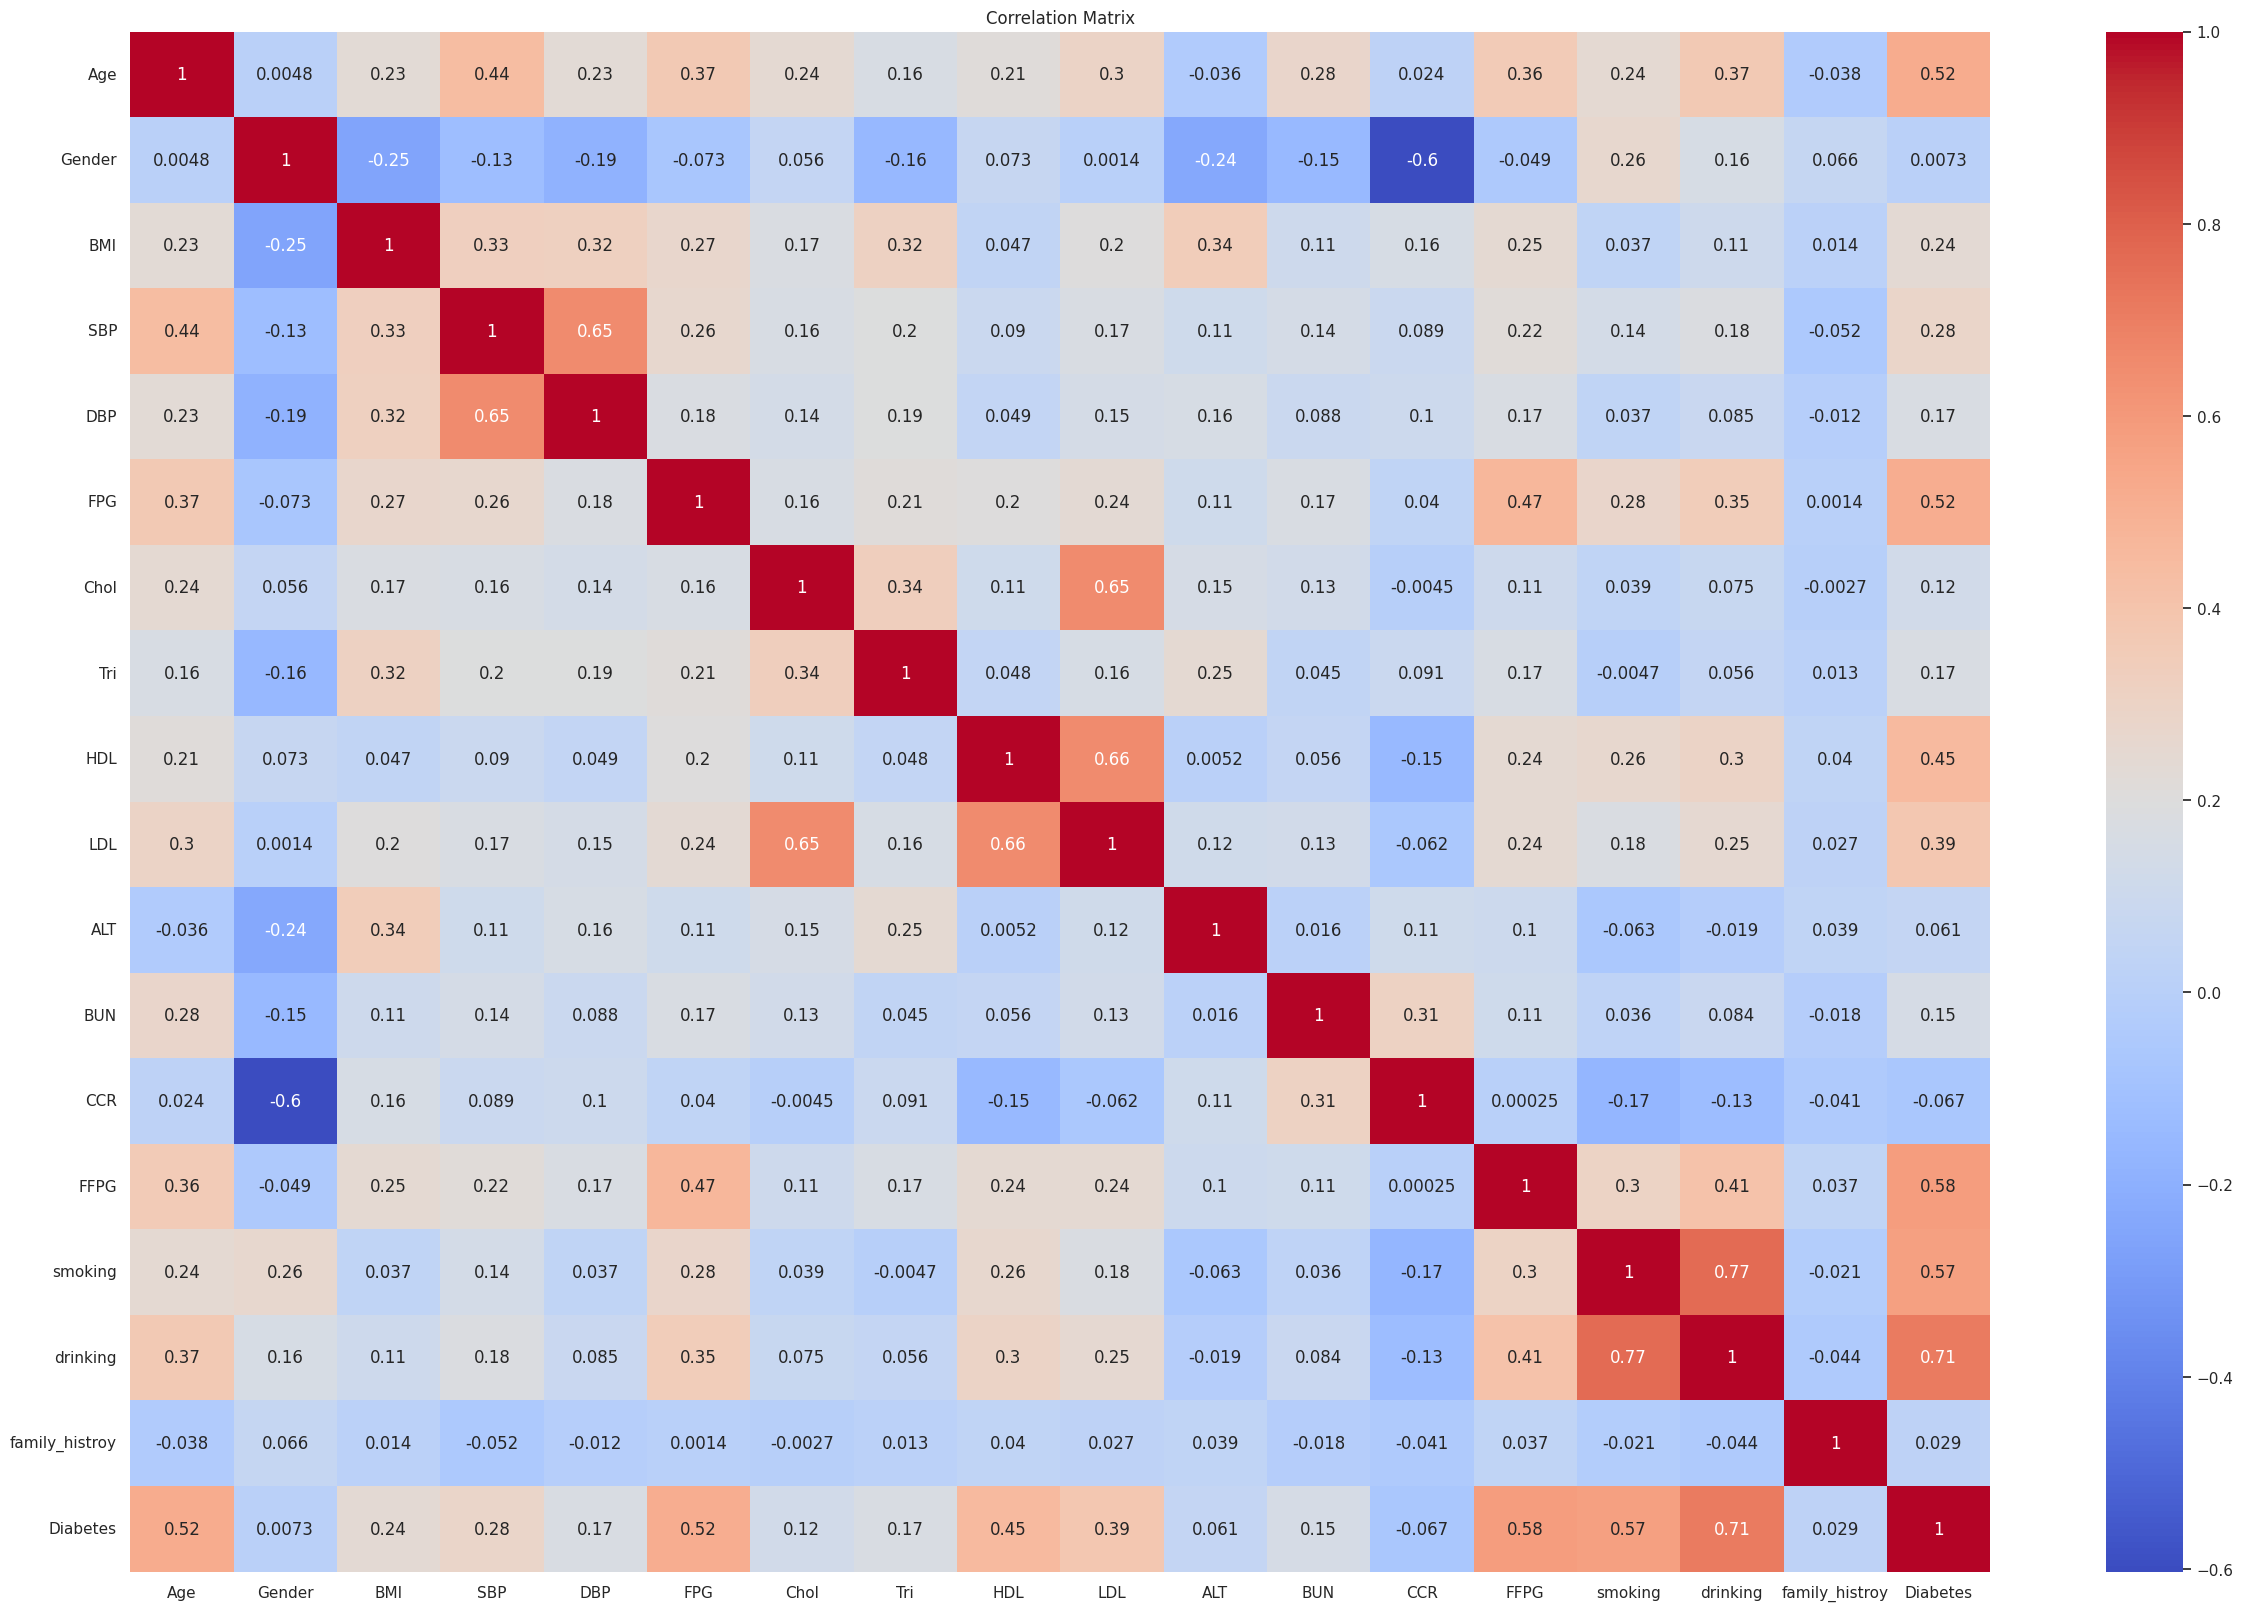

In [ ]:
corr_matrix = diabetes.corr()
fig, ax = pyplot.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
pyplot.show()

In [ ]:
x= diabetes.drop(columns='Diabetes')
y= diabetes['Diabetes']
X_train, X_val, y_train, y_val=train_test_split(x,y, shuffle=True, random_state=12, test_size=0.1)

In [ ]:
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)

In [17]:
param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.01, 0.1],
    'max_depth': [2, 4, 6, 8],
    'l2_leaf_reg' : [2,4,6,8],
    'rsm' : [0.3,0.5,0.6],
}

model = CatBoostClassifier()

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(scaled_x_train,y_train)
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

0:	learn: 0.6172120	total: 49.1ms	remaining: 7.32s
1:	learn: 0.5537811	total: 52.9ms	remaining: 3.91s
2:	learn: 0.5033092	total: 60.9ms	remaining: 2.99s
3:	learn: 0.4586438	total: 65.9ms	remaining: 2.4s
4:	learn: 0.4227618	total: 72.4ms	remaining: 2.1s
5:	learn: 0.3906346	total: 81ms	remaining: 1.94s
6:	learn: 0.3604474	total: 86.2ms	remaining: 1.76s
7:	learn: 0.3382965	total: 93.4ms	remaining: 1.66s
8:	learn: 0.3150805	total: 98.9ms	remaining: 1.55s
9:	learn: 0.2952771	total: 107ms	remaining: 1.49s
10:	learn: 0.2789241	total: 113ms	remaining: 1.43s
11:	learn: 0.2635316	total: 119ms	remaining: 1.37s
12:	learn: 0.2488192	total: 126ms	remaining: 1.33s
13:	learn: 0.2370366	total: 132ms	remaining: 1.28s
14:	learn: 0.2263655	total: 136ms	remaining: 1.23s
15:	learn: 0.2156871	total: 143ms	remaining: 1.2s
16:	learn: 0.2067856	total: 149ms	remaining: 1.17s
17:	learn: 0.2000012	total: 155ms	remaining: 1.14s
18:	learn: 0.1918062	total: 159ms	remaining: 1.1s
19:	learn: 0.1854921	total: 167ms	rema

In [21]:
# setup hyperparameters for catboost
model = CatBoostClassifier(verbose=0, eval_metric='Accuracy',iterations=150, learning_rate=0.1 ,max_depth=4 ,l2_leaf_reg=6 ,rsm=0.6)
model.fit(scaled_x_train, y_train)
y_pred = model.predict(scaled_x_val)

# define the evaluation method
cv = StratifiedKFold(n_splits=10)

# evaluate the model on the dataset
n_scores = cross_val_score(model, scaled_x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Accuracy score (training): {0:.3f}".format(model.score(scaled_x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(scaled_x_val, y_val)))

Mean Accuracy: 0.957 (0.012)
Accuracy score (training): 0.964
Accuracy score (validation): 0.954


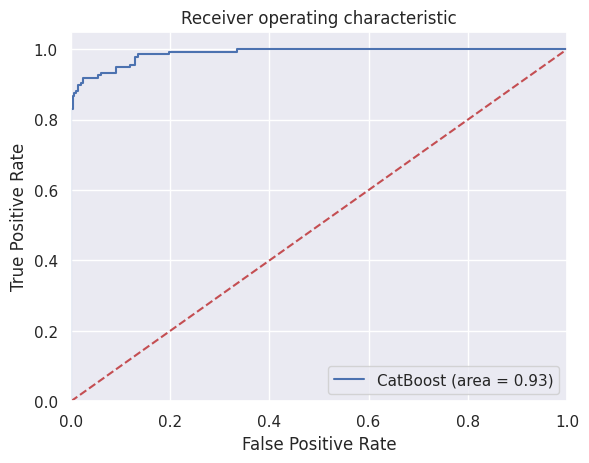

In [22]:
CatBoost_roc_auc = roc_auc_score(y_val, model.predict(scaled_x_val))
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(scaled_x_val)[:,1])
pyplot.figure()
pyplot.plot(fpr, tpr, label='CatBoost (area = %0.2f)' % CatBoost_roc_auc)
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.savefig('CatBoost_ROC')
pyplot.show()

In [23]:
#Confusion matrix, Accuracy, sensitivity and specificity
print(classification_report(y_val,y_pred))
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print('f1 score:', f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       295
           1       0.97      0.88      0.92       136

    accuracy                           0.95       431
   macro avg       0.96      0.93      0.94       431
weighted avg       0.95      0.95      0.95       431

Confusion Matrix : 
 [[291   4]
 [ 16 120]]
Sensitivity :  0.9864406779661017
Specificity :  0.8823529411764706
f1 score: 0.923076923076923


<Axes: >

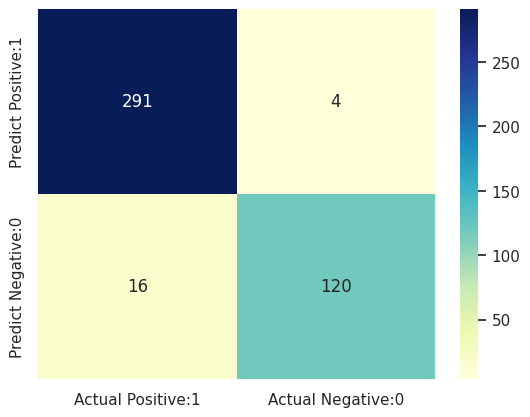

In [24]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
# Save the model in CatBoost's native format
model.save_model('CatBoost_model.json')